In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('test.csv')
data.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


# splitting data

In [10]:
train_input = np.array(data.x[0:200]).reshape(200,1)

train_output =  np.array(data.y[0:200]).reshape(200,1)

test_input =  np.array(data.y[200:300]).reshape(100,1)

test_output=  np.array(data.y[200:300]).reshape(100,1)

test_output.shape

(100, 1)

# Training

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_regressor = PolynomialFeatures( degree=2)
train_input_poly = poly_regressor.fit_transform(train_input)
poly_regressor.fit(train_input , train_output)

PolynomialFeatures()

In [61]:
linear_regressor = LinearRegression()
linear_regressor.fit(train_input_poly, train_output)

LinearRegression()

In [62]:
predicted_values = linear_regressor.predict(poly_regressor.fit_transform(test_input))
predicted_values[:10]

array([[79.13724832],
       [25.61172634],
       [75.75585618],
       [93.89291608],
       [70.03658644],
       [12.782299  ],
       [48.31482104],
       [80.07116466],
       [69.05284674],
       [73.87831076]])

In [63]:
test_output[:10]

array([[78.39683006],
       [25.75612514],
       [75.07484683],
       [92.88772282],
       [69.45498498],
       [13.12109842],
       [48.09843134],
       [79.3142548 ],
       [68.48820749],
       [73.2300846 ]])

In [67]:
from sklearn.metrics import mean_squared_error,r2_score
error = mean_squared_error(predicted_values,test_output)
error

0.2998256983731581

In [68]:

r2 = r2_score(predicted_values,test_output)
r2

0.9996412508732638

# visualizing the output

<function matplotlib.pyplot.show(close=None, block=None)>

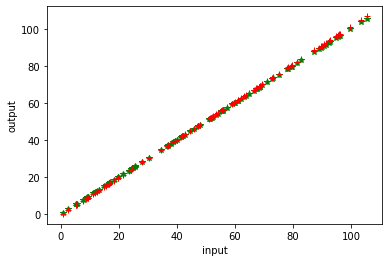

In [65]:
plt.plot(test_input, test_output, '*' ,color="green")
plt.plot(test_input, predicted_values, '+' ,color="red")
plt.xlabel('input')
plt.ylabel('output')
plt.show

ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.